In [0]:
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


This file used to generate some pics for the poster. It will go through the LassoRegression, KNN, RandomForest, 
XGBoost and Neural Network one by one.

For each model, It will go through the baseline model. Then model selection and the parameter optimization will be applied.
After that, we will choose the best model parameter to train the model. The the performance of each model will be compared.

Good Luck and Happy Code

## Lasso Regression
This algorithm is made my Osten. Only one parameter in this algorithm. Let's do it 

In [0]:
# Necessnary model
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
path = "Data/CleanedData.csv"

In [3]:
# Load Data for Lasso

from LassoRegression.LassoRegression_CS235 import  Load_Data as Load_Data_Lasso, Lasso
# from sklearn.linear_model import Lasso 

X_train_lasso, X_test_lasso, Y_train_lasso, Y_test_lasso = Load_Data_Lasso(path)

rs = ShuffleSplit(n_splits=5, random_state=0, test_size=0.20, train_size=None)

lasso_baseline = {"lamda": [0.1],
                  "CV error": [],
                  "CV std": []}

# Test CV 5
cv_train_error_lasso = []
cv_val_error_lasso = []
for train_split_index, test_split_index in rs.split(X_train_lasso, Y_train_lasso):
    # Split Dataset
    X_train_tmp = X_train_lasso[train_split_index]
    Y_train_tmp = Y_train_lasso[train_split_index]
    X_val_tmp = X_train_lasso[test_split_index]
    Y_val_tmp = Y_train_lasso[test_split_index]

    lasso_tmp = Lasso()
    lasso_tmp.fit(X_train_tmp, Y_train_tmp)
    
    cv_train_error_lasso.append(mean_squared_error(Y_train_tmp, lasso_tmp.predict(X_train_tmp)))
    cv_val_error_lasso.append(mean_squared_error(Y_val_tmp, lasso_tmp.predict(X_val_tmp)))

# Baseline Result 
lasso_baseline["CV error"].append(np.mean(cv_val_error_lasso))
lasso_baseline["CV std"].append(np.std(cv_val_error_lasso))
lasso_baseline = pd.DataFrame(lasso_baseline)
lasso_baseline
# """
# Here are result
# -----------------------
# 	lamda	CV error	CV std
# 0	0.1	0.436842	0.006584
# """

,lamda,CV error,CV std
0,0.1,0.436842,0.006584


In [4]:
# Now optimize the parameter lambda 
lasso = {"lamda": [],
                  "CV error": [],
                  "CV std": []}

lam_list = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1] 

for lam in lam_list:
    # Test CV 5
    cv_train_error_lasso = []
    cv_val_error_lasso = []
    for train_split_index, test_split_index in rs.split(X_train_lasso, Y_train_lasso):
        # Split Dataset
        X_train_tmp = X_train_lasso[train_split_index]
        Y_train_tmp = Y_train_lasso[train_split_index]
        X_val_tmp = X_train_lasso[test_split_index]
        Y_val_tmp = Y_train_lasso[test_split_index]
    
        lasso_tmp = Lasso( lam)
        lasso_tmp.fit(X_train_tmp, Y_train_tmp)
        
        cv_train_error_lasso.append(mean_squared_error(Y_train_tmp, lasso_tmp.predict(X_train_tmp)))
        cv_val_error_lasso.append(mean_squared_error(Y_val_tmp, lasso_tmp.predict(X_val_tmp)))

    # Baseline Result 
    lasso["lamda"].append(lam)
    lasso["CV error"].append(np.mean(cv_val_error_lasso))
    lasso["CV std"].append(np.std(cv_val_error_lasso))
lasso = pd.DataFrame(lasso)
lasso


# """
# Here are result
# -----------------------
# lamda	CV error	CV std
# 0	0.0001	0.436806	0.006584
# 1	0.0010	0.436809	0.006584
# 2	0.0050	0.436824	0.006584
# 3	0.0100	0.436842	0.006584
# 4	0.0500	0.436989	0.006585
# 5	0.1000	0.437174	0.006587
# 6	0.3000	0.437918	0.006592
# 7	1.0000	0.440604	0.006611
# """    

,lamda,CV error,CV std
0,0.0001,0.436806,0.006584
1,0.0010,0.436809,0.006584
2,0.0050,0.436824,0.006584
3,0.0100,0.436842,0.006584
4,0.0500,0.436989,0.006585
5,0.1000,0.437174,0.006587
6,0.3000,0.437918,0.006592
7,1.0000,0.440604,0.006611


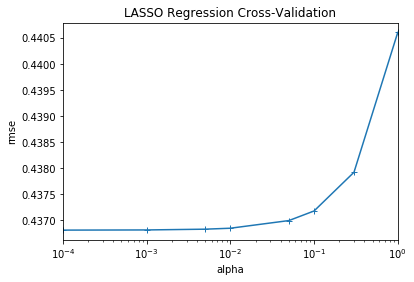

In [5]:
cv_lasso = pd.Series(lasso["CV error"].tolist(), index = lasso["lamda"].tolist())
cv_lasso.plot(title = "LASSO Regression Cross-Validation", style='-+') 
plt.xlabel("alpha") 
plt.ylabel("rmse") 
plt.xscale('log')

The best lambda in Lasso is 0.001





## KNN 
This part is made by XiangTing. Only K need to be optimize

In [6]:
# Load Data For KNN
from XGBoost.XGBoost_CS235 import Load_Data as Load_Data_KNN
from sklearn.neighbors.regression import KNeighborsRegressor

X_train, Y_train, X_test, Y_test = Load_Data_KNN(path)
knn_base = {"k": [5],
                  "CV error": [],
                  "CV std": []}
knn_basemodel = KNeighborsRegressor()
cv_score = -cross_val_score(knn_basemodel, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")

knn_base["CV error"] = np.mean(cv_score)
knn_base["CV std"] = np.std(cv_score)

knn_base = pd.DataFrame(knn_base)
knn_base

# 	k	CV error	CV std
# 0	5	0.380252	0.004984

,k,CV error,CV std
0,5,0.380252,0.004984


In [7]:
# K optimization
knn_mdels = {"k": [],
                  "CV error": [],
                  "CV std": []}
k_list = range(5,50,5)
for k in k_list:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    cv_score = -cross_val_score(knn_model, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")
    
    knn_mdels["k"].append(k)
    knn_mdels["CV error"].append(np.mean(cv_score))
    knn_mdels["CV std"].append(np.std(cv_score))
    
knn_mdels = pd.DataFrame(knn_mdels)
knn_mdels

# 	k	CV error	CV std
# 0	5	0.380252	0.004984
# 1	10	0.364216	0.004639
# 2	15	0.361765	0.004039
# 3	20	0.362062	0.004505
# 4	25	0.362992	0.004487
# 5	30	0.364213	0.004336
# 6	35	0.365166	0.004420
# 7	40	0.366303	0.004765
# 8	45	0.367205	0.004956

,k,CV error,CV std
0,5,0.380252,0.004984
1,10,0.364216,0.004639
2,15,0.361765,0.004039
3,20,0.362062,0.004505
4,25,0.362992,0.004487
5,30,0.364213,0.004336
6,35,0.365166,0.004420
7,40,0.366303,0.004765
8,45,0.367205,0.004956


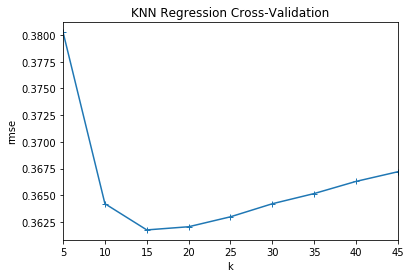

In [26]:

cv_knn = pd.Series(knn_mdels["CV error"].tolist(), index = knn_mdels["k"].tolist())
cv_knn.plot(title = "KNN Regression Cross-Validation", style='-+') 
plt.xlabel("k") 
plt.ylabel("rmse") 
# plt.xscale('log')
plt.savefig("KNN_Tunning_Figure.png")


The Best K of KNN is 15

## RandomForest

This part is made by Faisal. Several params need to be optimized:  
n_estimator  
max_depth  


In [9]:
from sklearn.ensemble import RandomForestRegressor
# Base Model 
rf_base = {"n_estimators": [10],
            "max_depth": [4],
                  "CV error": [],
                  "CV std": []}
rf_basemodel = RandomForestRegressor(n_estimators=10, max_depth= 4)
cv_score = -cross_val_score(rf_basemodel, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")

rf_base["CV error"] = np.mean(cv_score)
rf_base["CV std"] = np.std(cv_score)

rf_base = pd.DataFrame(rf_base)
rf_base

#   n_estimators	max_depth	CV error	CV std
# 0	10	4	0.187798	0.003455

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

,n_estimators,max_depth,CV error,CV std
0,10,4,0.187798,0.003455


In [10]:
#  n_estimator and depth optimize
rf_mdels = {"n_estimators": [],
            "max_depth": [],
                  "CV error": [],
                  "CV std": []}
estimator_list = range(10,20,2)
max_depth = range(10,100,10)
for e in estimator_list:
    for d in max_depth:
        rf_model = RandomForestRegressor(n_estimators= e, max_depth=d, n_jobs= 4)
        cv_score = -cross_val_score(rf_model, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")
        
        rf_mdels["n_estimators"].append(e)
        rf_mdels["max_depth"].append(d)
        rf_mdels["CV error"].append(np.mean(cv_score))
        rf_mdels["CV std"].append(np.std(cv_score))
        
rf_mdels = pd.DataFrame(rf_mdels)
# rf_mdels



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

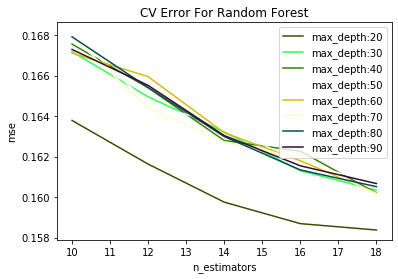

In [29]:
## Picture of RandomForest
import matplotlib as mlp
colors = np.random.choice(list(mlp.colors.XKCD_COLORS.keys()), len(max_depth), replace=False)
comment_list = []
for i, d in enumerate(max_depth):
    if i >0:
        plt.plot("n_estimators","CV error", data = rf_mdels[rf_mdels["max_depth"] == d], color = colors[i], label = "max_depth:" + str(d))
        comment_list.append("max_depth:" + str(d))
        
plt.legend(comment_list,loc='upper right')
plt.xlabel("n_estimators")
plt.ylabel("mse")
plt.title("CV Error For Random Forest")
plt.savefig("RF_tunning_fig.png")
plt.show()

Best params:
depth = 20
n_estimator = 18

## XGBoost  
This part is made by Xinlong. Several params need to be optimized:  
n_estimator  
max_depth  

In [12]:
from xgboost import XGBRegressor
xgb_baseline = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=5, tree_method='gpu_hist', gpu_id=0)

fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "rmse",
            "eval_set" : [(X_test, Y_test)],
            "verbose":False}

cv_res = -cross_val_score(xgb_baseline, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, fit_params = fit_params)

xgb_baseline_results = pd.DataFrame({
            "learning_rate": [0.05],
            'CV error': cv_res.mean(), 
            'CV std': cv_res.std()})

# 	learning_rate	CV error	CV std
# 0	0.05	0.156075	0.002899

[03:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
# Optimize the lr
d = {'Learning Rate':[],
            'CV Error': [],
            'CV Std': []}

for lr in [0.01, 0.05, 0.1, 0.5]:
    xgb_model = XGBRegressor(n_estimators=1000, learning_rate=lr, early_stopping_rounds=5, tree_method='gpu_hist', gpu_id=0)
    cv_res = -cross_val_score(xgb_model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, fit_params = fit_params)
    d['Learning Rate'].append(lr)
    d['CV Error'].append(cv_res.mean())
    d['CV Std'].append(cv_res.std())


xgb_models = pd.DataFrame(d)
xgb_models


# 	Learning Rate	CV Error	CV Std
# 0	0.01	0.160420	0.002794
# 1	0.05	0.156075	0.002899
# 2	0.10	0.155510	0.002743
# 3	0.50	0.157349	0.002353

[03:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,Learning Rate,CV Error,CV Std
0,0.01,0.160423,0.002794
1,0.05,0.156048,0.002793
2,0.10,0.155510,0.002743
3,0.50,0.157644,0.002556


KeyError: ignored

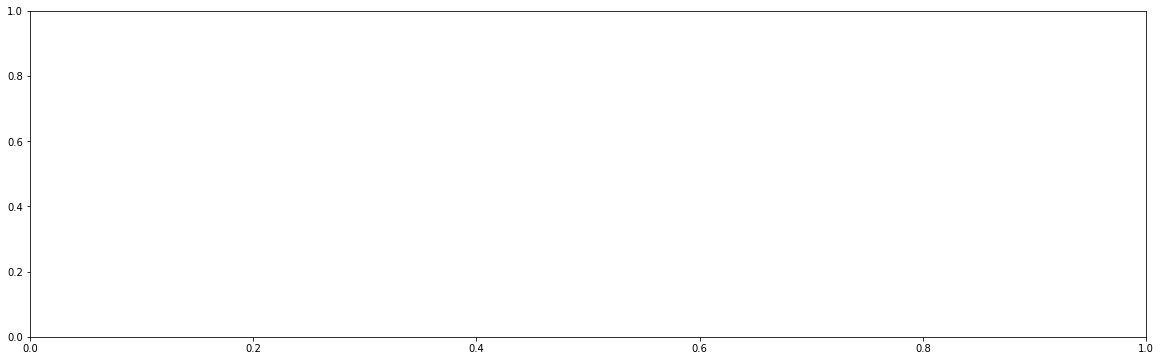

In [30]:
## Learning Rate graph
fig, ax = plt.subplots(1, 1, figsize=(20,6))

ax.plot(xgb_models['Learning Rate'], xgb_models['CV Error'], color='red')
ax.plot(xgb_models['Learning Rate'], xgb_models['CV Error'], 'o', color='black')
ax.fill_between(xgb_models['Learning Rate'], xgb_models['CV Error'] - xgb_models['CV Std'], xgb_models['CV Error'] + xgb_models['CV Std'], color='r', alpha=.1)
ax.legend(fontsize=12, loc = 'center right');
ax.set_ylim(0.15, 0.17)
plt.title('CV Error For Each Learning Rate')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Mean Squared Error')
plt.savefig("XGB_lr.png")

## The Best Learn Rate is 0.1

In [15]:
d = {'max_depth':[],
             'min_child_weight': [],
            'CV Error': [],
            'CV Std': []}

params2 = {'max_depth': list(range(3,10,2)), 'min_child_weight': list(range(1,6,2))}

for md in params2['max_depth']:
    for mcw in params2['min_child_weight']:
        xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=md, min_child_weight=mcw,  tree_method='gpu_hist', gpu_id=0 )
        cv_res = -cross_val_score(xgb_model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, fit_params= fit_params)
        d['max_depth'].append(md)
        d['min_child_weight'].append(mcw)
        d['CV Error'].append(cv_res.mean())
        d['CV Std'].append(cv_res.std())
xgb_models = pd.DataFrame(d)
xgb_models


# 	max_depth	min_child_weight	CV Error	CV Std
# 0	3	1	0.155510	0.002743
# 1	3	3	0.155343	0.002542
# 2	3	5	0.155356	0.002808
# 3	5	1	0.151883	0.002741
# 4	5	3	0.151720	0.002916
# 5	5	5	0.151301	0.002759
# 6	7	1	0.150006	0.002579
# 7	7	3	0.149992	0.002405
# 8	7	5	0.149816	0.002947
# 9	9	1	0.149163	0.002432
# 10	9	3	0.149281	0.002582
# 11	9	5	0.149052	0.002691

[03:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,max_depth,min_child_weight,CV Error,CV Std
0,3,1,0.155510,0.002743
1,3,3,0.155343,0.002542
2,3,5,0.155356,0.002808
3,5,1,0.151883,0.002741
4,5,3,0.151720,0.002916
5,5,5,0.151301,0.002759
6,7,1,0.150006,0.002579
7,7,3,0.149992,0.002405
8,7,5,0.149816,0.002947
9,9,1,0.149163,0.002432


In [16]:
xgb_models = pd.DataFrame(d)
xgb_models

,max_depth,min_child_weight,CV Error,CV Std
0,3,1,0.155510,0.002743
1,3,3,0.155343,0.002542
2,3,5,0.155356,0.002808
3,5,1,0.151883,0.002741
4,5,3,0.151720,0.002916
5,5,5,0.151301,0.002759
6,7,1,0.150006,0.002579
7,7,3,0.149992,0.002405
8,7,5,0.149816,0.002947
9,9,1,0.149163,0.002432


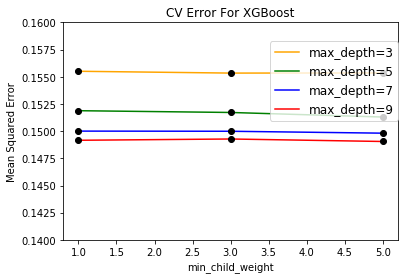

In [31]:
# fig, axes = plt.subplots(1, 1, figsize=(20,6))

colors = ['orange','green','blue','red']

for i, md in enumerate(params2['max_depth']):
    color = colors[i]
    xgb_tuning_3 = xgb_models[xgb_models['max_depth']==md]
    plt.plot(xgb_tuning_3['min_child_weight'], xgb_tuning_3['CV Error'], color=color, label= 'max_depth='+str(md))
    plt.plot(xgb_tuning_3['min_child_weight'], xgb_tuning_3['CV Error'], 'o', color='black', label='_nolegend_')

plt.xlabel('min_child_weight')
plt.ylabel('Mean Squared Error')
    
plt.title('CV Error For XGBoost')

plt.legend(fontsize=12, bbox_to_anchor=(0.6, .52, .7, .602), loc=3,);
plt.ylim([0.14, 0.16])
plt.savefig("XGB_tunning_fig.png")

Best paras of XGBoost:
max_depth = 9
min_child = 5
lr = 0.1



## Neural Network
This part is made by Dekang. He choose 5 different models and compare there performance. The training result he already saved. And we Choose model C as the best parameters.
 


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from XGBoost.XGBoost_CS235 import Load_Data as Load_Data_KNN
X_train, Y_train, X_test, Y_test = Load_Data_KNN(path)


# Regressor=NN('Data/AB_NYC_2019.csv')
# Regressor.clean_data()
# # Regressor.Normalization()
# data = np.load("Neural_Network/data.npy")
# X_trian_nn, X_test_nn, Y_train_nn, Y_test_nn = train_test_split(data[:,:-1], data[:,-1],
                                                                # test_size = 0.1, shuffle = True)

data_length = X_train.shape[1]

EPOCHS = 1000
checkpoint_path = ''
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=1000)

early_stop = keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=10)
model = keras.Sequential([
                layers.Dense(32, activation='relu', input_shape=(data_length,)),
                layers.Dense(16, activation='relu'),
                layers.Dense(8, activation='relu'),
                layers.Dense(1)
            ])
optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])
history = model.fit(x=X_train, y=Y_train, epochs=EPOCHS,

                    validation_data=[X_test, Y_test],
                    callbacks=[cp_callback, early_stop],verbose = 0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Model Compare
This part train the model for the bset params, and compare the result of each model  
Lasso: lambda = 0.001  
KNN: K = 15  
RF: depth = 20, n_estimator = 18  
XGBRegressor：max_depth = 9 min_child = 5 lr = 0.1  


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors.regression import KNeighborsRegressor
from LassoRegression.LassoRegression_CS235 import Lasso
from xgboost import XGBRegressor

def RF_best():
  return RandomForestRegressor(n_estimators=18, max_depth= 20)

def KNN_bset():
  return KNeighborsRegressor(n_neighbors= 15)

def Lasso_best():
  return Lasso(0.001)

def XGB_best():
  return XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping_rounds=5, max_depth=9, min_child_weight=5, tree_method='gpu_hist', gpu_id=0)

def NN_best(data):
  data_length = data.shape[1]

  EPOCHS = 1000
  checkpoint_path = ''
  cp_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_path,
      verbose=1,
      save_weights_only=True,
      period=1000)

  model = keras.Sequential([
                  layers.Dense(32, activation='relu', input_shape=(data_length,)),
                  layers.Dense(16, activation='relu'),
                  layers.Dense(8, activation='relu'),
                  layers.Dense(1)
              ])
  optimizer = tf.keras.optimizers.Adam(0.0001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
rs = ShuffleSplit(n_splits=5, random_state=0, test_size=0.20, train_size=None)

Model_compare = {"Model_name": [],
                  "CV error": [],
                  "CV std": [],
                 "Train error":[],
                 "Test error":[],
                 "Train r2 score": [],
                 "Test r2 score": []}

# Test CV 5
cv_train_error_lasso = []
cv_val_error_lasso = []
for train_split_index, test_split_index in rs.split(X_train_lasso, Y_train_lasso):
    # Split Dataset
    X_train_tmp = X_train_lasso[train_split_index]
    Y_train_tmp = Y_train_lasso[train_split_index]
    X_val_tmp = X_train_lasso[test_split_index]
    Y_val_tmp = Y_train_lasso[test_split_index]

    lasso_tmp = Lasso_best()
    lasso_tmp.fit(X_train_tmp, Y_train_tmp)
    
    cv_train_error_lasso.append(mean_squared_error(Y_train_tmp, lasso_tmp.predict(X_train_tmp)))
    cv_val_error_lasso.append(mean_squared_error(Y_val_tmp, lasso_tmp.predict(X_val_tmp)))

final_lasso = Lasso_best()
final_lasso.fit(X_train_lasso, Y_train_lasso)


# Add Lasso to the result 
Model_compare["CV error"].append(np.mean(cv_val_error_lasso))
Model_compare["CV std"].append(np.std(cv_val_error_lasso))
Model_compare["Train error"].append(mean_squared_error(Y_train_lasso, final_lasso.predict(X_train_lasso)))
Model_compare["Test error"].append(mean_squared_error(Y_test_lasso, final_lasso.predict(X_test_lasso)))
Model_compare["Train r2 score"].append(r2_score(Y_train_lasso, final_lasso.predict(X_train_lasso)))
Model_compare["Test r2 score"].append(r2_score(Y_test_lasso, final_lasso.predict(X_test_lasso)))
Model_compare["Model_name"].append("Lasso")
Model_compare



{'CV error': [0.4368092776037729],
 'CV std': [0.006583621628866185],
 'Model_name': ['Lasso'],
 'Test error': [0.19853539375466236],
 'Test r2 score': [0.529804462042124],
 'Train error': [0.19889071581059417],
 'Train r2 score': [0.533427812236807]}

In [21]:
# KNN Model


knn_best = KNN_bset()
cv_score = -cross_val_score(knn_best, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")
knn_best.fit(X_train, Y_train)

# Add KNN to the result 
Model_compare["CV error"].append(cv_score.mean())
Model_compare["CV std"].append(cv_score.std())
Model_compare["Train error"].append(mean_squared_error(Y_train, knn_best.predict(X_train)))
Model_compare["Test error"].append(mean_squared_error(Y_test, knn_best.predict(X_test)))
Model_compare["Train r2 score"].append(r2_score(Y_train, knn_best.predict(X_train)))
Model_compare["Test r2 score"].append(r2_score(Y_test, knn_best.predict(X_test)))
Model_compare["Model_name"].append("KNN")
Model_compare

{'CV error': [0.4368092776037729, 0.3617647876908037],
 'CV std': [0.006583621628866185, 0.004039457915030184],
 'Model_name': ['Lasso', 'KNN'],
 'Test error': [0.19853539375466236, 0.3657345071555717],
 'Test r2 score': [0.529804462042124, 0.17062197725597295],
 'Train error': [0.19889071581059417, 0.3099413944069304],
 'Train r2 score': [0.533427812236807, 0.26934986409094774]}

In [22]:
# RandomForest Model
rf_best = RF_best()
cv_score = -cross_val_score(rf_best, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")
rf_best.fit(X_train, Y_train)

# Add KNN to the result 
Model_compare["CV error"].append(cv_score.mean())
Model_compare["CV std"].append(cv_score.std())
Model_compare["Train error"].append(mean_squared_error(Y_train, rf_best.predict(X_train)))
Model_compare["Test error"].append(mean_squared_error(Y_test, rf_best.predict(X_test)))
Model_compare["Train r2 score"].append(r2_score(Y_train, rf_best.predict(X_train)))
Model_compare["Test r2 score"].append(r2_score(Y_test, rf_best.predict(X_test)))
Model_compare["Model_name"].append("Random Forest")
Model_compare

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

{'CV error': [0.4368092776037729, 0.3617647876908037, 0.1581614976639593],
 'CV std': [0.006583621628866185, 0.004039457915030184, 0.003652078044570568],
 'Model_name': ['Lasso', 'KNN', 'Random Forest'],
 'Test error': [0.19853539375466236, 0.3657345071555717, 0.1614199799970649],
 'Test r2 score': [0.529804462042124, 0.17062197725597295, 0.6339470812241443],
 'Train error': [0.19889071581059417,
  0.3099413944069304,
  0.043509918439970825],
 'Train r2 score': [0.533427812236807,
  0.26934986409094774,
  0.8974305194619541]}

In [23]:
## XGB best Model
xgb_best = XGB_best()

fit_params={"early_stopping_rounds":10, 
            "eval_metric" : "rmse",
            "eval_set" : [(X_test, Y_test)],
            "verbose":False}

cv_score = -cross_val_score(xgb_best, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, fit_params = fit_params)

xgb_best.fit(X_train, Y_train, early_stopping_rounds = 10, eval_metric = 'rmse',
             eval_set = [(X_test, Y_test)],
             verbose=False)

# Add XGB to the result 
Model_compare["CV error"].append(cv_score.mean())
Model_compare["CV std"].append(cv_score.std())
Model_compare["Train error"].append(mean_squared_error(Y_train, xgb_best.predict(X_train)))
Model_compare["Test error"].append(mean_squared_error(Y_test, xgb_best.predict(X_test)))
Model_compare["Train r2 score"].append(r2_score(Y_train, xgb_best.predict(X_train)))
Model_compare["Test r2 score"].append(r2_score(Y_test, xgb_best.predict(X_test)))
Model_compare["Model_name"].append("XGBoost")
Model_compare


[03:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'CV error': [0.4368092776037729,
  0.3617647876908037,
  0.1581614976639593,
  0.14886141490035856],
 'CV std': [0.006583621628866185,
  0.004039457915030184,
  0.003652078044570568,
  0.0026456277622506456],
 'Model_name': ['Lasso', 'KNN', 'Random Forest', 'XGBoost'],
 'Test error': [0.19853539375466236,
  0.3657345071555717,
  0.1614199799970649,
  0.15267095103141207],
 'Test r2 score': [0.529804462042124,
  0.17062197725597295,
  0.6339470812241443,
  0.6537872992032938],
 'Train error': [0.19889071581059417,
  0.3099413944069304,
  0.043509918439970825,
  0.10930861781173355],
 'Train r2 score': [0.533427812236807,
  0.26934986409094774,
  0.8974305194619541,
  0.7423178771812742]}

In [24]:
## NN best Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

early_stop = keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=10)

# fit_params_nn={"epochs":1000, 
#             "callbacks" : [ early_stop],
#             "validation_data" : [(X_test, Y_test)]}

# Test CV 5
cv_train_error_nn = []
cv_val_error_nn = []
for train_split_index, test_split_index in rs.split(X_train, Y_train):
    # Split Dataset
    X_train_tmp = X_train[train_split_index]
    Y_train_tmp = Y_train[train_split_index]
    X_val_tmp = X_train[test_split_index]
    Y_val_tmp = Y_train[test_split_index]

    
    nn_best = NN_best(X_train_tmp)
    nn_best.fit(X_train_tmp, Y_train_tmp, epochs = 1000, callbacks=  [ early_stop], verbose = False, validation_data = (X_test, Y_test))
    
    cv_train_error_nn.append(mean_squared_error(Y_train_tmp, nn_best.predict(X_train_tmp)))
    cv_val_error_nn.append(mean_squared_error(Y_val_tmp, nn_best.predict(X_val_tmp)))

nn_best = NN_best(X_train)
nn_best.fit(X_train, Y_train, epochs = 1000, callbacks=  [ early_stop], validation_data = (X_test, Y_test), verbose= False)


# Add Lasso to the result 
Model_compare["CV error"].append(np.mean(cv_val_error_nn))
Model_compare["CV std"].append(np.std(cv_val_error_nn))
Model_compare["Train error"].append(mean_squared_error(Y_train, nn_best.predict(X_train)))
Model_compare["Test error"].append(mean_squared_error(Y_test, nn_best.predict(X_test)))
Model_compare["Train r2 score"].append(r2_score(Y_train, nn_best.predict(X_train)))
Model_compare["Test r2 score"].append(r2_score(Y_test, nn_best.predict(X_test)))
Model_compare["Model_name"].append("Neural Network")
Model_compare


{'CV error': [0.4368092776037729,
  0.3617647876908037,
  0.1581614976639593,
  0.14886141490035856,
  0.18569074975407118],
 'CV std': [0.006583621628866185,
  0.004039457915030184,
  0.003652078044570568,
  0.0026456277622506456,
  0.03177807689547195],
 'Model_name': ['Lasso', 'KNN', 'Random Forest', 'XGBoost', 'Neural Network'],
 'Test error': [0.19853539375466236,
  0.3657345071555717,
  0.1614199799970649,
  0.15267095103141207,
  0.17909059328197788],
 'Test r2 score': [0.529804462042124,
  0.17062197725597295,
  0.6339470812241443,
  0.6537872992032938,
  0.5938753406030675],
 'Train error': [0.19889071581059417,
  0.3099413944069304,
  0.043509918439970825,
  0.10930861781173355,
  0.16528878915809883],
 'Train r2 score': [0.533427812236807,
  0.26934986409094774,
  0.8974305194619541,
  0.7423178771812742,
  0.6103512520691325]}

In [25]:
Model_compare_df = pd.DataFrame(Model_compare)
Model_compare_df
#   Model_name	CV error	CV std	Train error	Test error	Train r2 score	Test r2 score
# 0	Lasso	0.436809	0.006584	0.198891	0.198535	0.533428	0.529804
# 1	KNN	0.361765	0.004039	0.309941	0.365735	0.269350	0.170622
# 2	Random Forest	0.158161	0.003652	0.043510	0.161420	0.897431	0.633947
# 3	XGBoost	0.148861	0.002646	0.109309	0.152671	0.742318	0.653787
# 4	Neural Network	0.185691	0.031778	0.165289	0.179091	0.610351	0.593875

,Model_name,CV error,CV std,Train error,Test error,Train r2 score,Test r2 score
0,Lasso,0.436809,0.006584,0.198891,0.198535,0.533428,0.529804
1,KNN,0.361765,0.004039,0.309941,0.365735,0.269350,0.170622
2,Random Forest,0.158161,0.003652,0.043510,0.161420,0.897431,0.633947
3,XGBoost,0.148861,0.002646,0.109309,0.152671,0.742318,0.653787
4,Neural Network,0.185691,0.031778,0.165289,0.179091,0.610351,0.593875
